# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [8]:
# run
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [18]:
#run
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
#no se usa

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [13]:
#run
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [14]:
# A loop will be excecuted to capture images to generate a video

cap = cv2.VideoCapture(0) #video capture
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #loop all over the frames in the camera

        # Read feed
        ret, frame = cap.read() #reading frame from a webcam

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

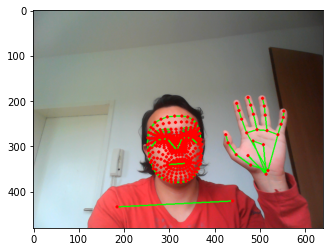

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
# values of x, y z and visibility are received from landmark detection


pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
 #   if results.face_landmarks 
  #  else np.zeros(1404)


In [15]:
# run  
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.49556455,  0.64291674, -0.85260564, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
468*3+33*4+21*3+21*3

1662

In [27]:
np.save('0', result_test)

In [28]:
np.load('0.npy')

array([ 0.49556455,  0.64291674, -0.85260564, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [28]:
#run for actions

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['UP', 'DOWN', 'STOP'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
# UP
## 0
## 1
## 2
## ...
## 29
# DOWN

# STOP

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'COLLECTING DATA', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
label_map = {label:num for num, label in enumerate(actions)}

NameError: name 'actions' is not defined

In [ ]:
label_map

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [3]:
np.array(sequences).shape

NameError: name 'np' is not defined

In [31]:
np.array(labels).shape

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [22]:

#run
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [55]:
res = [.7, 0.2, 0.1]

In [33]:
actions[np.argmax(res)]

IndexError: index 4 is out of bounds for axis 0 with size 3

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# tensorboard Logs\train tensorboard --logdir=.

In [58]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 430ms/step - loss: 1.0559 - categorical_accuracy: 0.3641
Epoch 2/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.2322 - categorical_accuracy: 0.4715
Epoch 3/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.2472 - categorical_accuracy: 0.3856
Epoch 4/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.9615 - categorical_accuracy: 0.3072
Epoch 5/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.9208 - categorical_accuracy: 0.4422
Epoch 6/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.7547 - categorical_accuracy: 0.3210
Epoch 7/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.1300 - categorical_accuracy: 0.4364
Epoch 8/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.8371 - categorical_accuracy: 0.4795
Epoch 9/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.1389 - categorical_accuracy: 0.3659


3/3 [==============================] - 0s 90ms/step - loss: 0.2266 - categorical_accuracy: 0.9276
Epoch 147/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1670 - categorical_accuracy: 0.9667
Epoch 148/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.1537 - categorical_accuracy: 0.9667
Epoch 149/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1107 - categorical_accuracy: 0.9726
Epoch 150/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1393 - categorical_accuracy: 0.9667
Epoch 151/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0927 - categorical_accuracy: 0.9824
Epoch 152/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1023 - categorical_accuracy: 0.9784
Epoch 153/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1364 - categorical_accuracy: 0.9667
Epoch 154/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0917 - categorical_accuracy: 0.982

KeyboardInterrupt: 

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [38]:
res = model.predict(X_test)

NameError: name 'model' is not defined

In [61]:
actions[np.argmax(res[4])]

'STOP'

In [62]:
actions[np.argmax(y_test[4])]

'STOP'

# 9. Save Weights

In [63]:
model.save('action.h5')

In [50]:
#del model

In [37]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [2]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [3]:
yhat = model.predict(X_train)

NameError: name 'model' is not defined

In [67]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [68]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  2],
        [ 0, 30]],

       [[54,  1],
        [ 2, 28]],

       [[60,  0],
        [ 1, 24]]], dtype=int64)

In [69]:
accuracy_score(ytrue, yhat)

0.9647058823529412

# 11. Test in Real Time

In [30]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
print(np.shape(cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)))

NameError: name 'output_frame' is not defined

In [31]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

#The error "only length-1 arrays can be converted to Python scalars" is raised when the function expects a single value 
#but you pass an array instead.

IndexError: list index out of range

<Figure size 1296x1296 with 0 Axes>

In [93]:
sequence.reverse()

In [94]:
len(sequence)

30

In [95]:
sequence.append('def')

In [96]:
sequence.reverse()

In [97]:
sequence[-30:]

[array([ 0.76392829,  0.64968216, -0.84331942, ...,  0.06255005,
         0.84595776,  0.02987676]),
 array([ 0.76200211,  0.64965975, -0.8244133 , ...,  0.07727488,
         0.84433645,  0.02765712]),
 array([ 0.75986189,  0.65058964, -0.82800758, ...,  0.01583307,
         0.84116173,  0.07713533]),
 array([ 0.75882506,  0.6510306 , -0.86859691, ...,  0.05357546,
         0.85514325,  0.06797765]),
 array([ 0.75753212,  0.65095669, -0.86743367, ..., -0.03305253,
         0.84680778,  0.03758729]),
 array([ 0.75596321,  0.65093815, -0.88409054, ...,  0.03532212,
         0.85839963,  0.09392168]),
 array([ 0.75073159,  0.64971316, -0.89123809, ...,  0.06128892,
         0.86086625,  0.0463385 ]),
 array([ 0.74445301,  0.64950353, -0.89243507, ...,  0.06135219,
         0.9055993 ,  0.06945629]),
 array([ 0.74313635,  0.64804608, -0.77389497, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.73595643,  0.6446743 , -1.07578647, ...,  0.        ,
         0.        ,  0.  

In [29]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: index 4 is out of bounds for axis 0 with size 3

In [100]:
cap.release()
cv2.destroyAllWindows()

In [101]:
res[np.argmax(res)] > threshold

True

In [102]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [103]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.52238613, 0.31037638, 0.16723746]], dtype=float32)